In [1]:
#import xarray as xr

import numpy as np
import pandas as pd
# from pathlib import Path

# import os, sys
# import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
#import seaborn as sns
#sns.set_style('ticks')
from scipy import signal
# from scipy import stats
# from scipy.stats import percentileofscore

from datetime import datetime, timedelta
from vtools.functions.filter import cosine_lanczos
from vtools.data.vtime import days, hours, minutes


/global/home/users/jennaisrael/.conda/envs/schimpy/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#function comes from schimpy metricsplot.py script https://github.com/CADWRDeltaModeling/schimpy/blob/master/schimpy/metricsplot.py
def filter_timeseries(tss, cutoff_period=hours(40)):
    """ Filter time series

        Parameters
        ----------

        Returns
        -------
        list of vtools.data.timeseries.TimeSeries
            filtered time series
    """

    filtered = []
    ts=tss #try removing the loop for now
    if ts is None:
        filtered.append(None)
    else:
        #print(ts)
        ts_filtered = cosine_lanczos(ts, cutoff_period=cutoff_period)
        ts_filtered.filtered = 'cosine_lanczos'
        #ts_filtered.unit = ts.unit
        #filtered.append(ts_filtered)
    # for ts in tss:
    #     if ts is None:
    #         filtered.append(None)
    #     else:
    #         print(ts)
    #         ts_filtered = cosine_lanczos(ts, cutoff_period=cutoff_period)
    #         ts_filtered.filtered = 'cosine_lanczos'
    #         ts_filtered.unit = ts.unit
    #         filtered.append(ts_filtered)
    return ts_filtered

# Tidally filter and then 40 day boxcar filter the jersey point, franks tract, and holland cut data

In [3]:
dtformat = '%Y-%m-%dT%H:%M:%S'
hol2_filled=pd.read_csv('/global/scratch/users/jennaisrael/time_varying_data/dmsdatastore/salinity/hol2_gapfilled_2025_12_15.csv')
hol2_filled['datetime']=pd.to_datetime(hol2_filled['datetime'],format=dtformat)
hol2_filled.set_index("datetime",inplace=True)
hol2_filled=hol2_filled.asfreq('15min')
hol2_filt=filter_timeseries(hol2_filled).dropna()


jp_filled=pd.read_csv('/global/scratch/users/jennaisrael/time_varying_data/dmsdatastore/salinity/jp_gapfilled_2025_12_15.csv')
jp_filled['datetime']=pd.to_datetime(jp_filled['datetime'],format=dtformat)
jp_filled.set_index("datetime",inplace=True)
jp_filled=jp_filled.asfreq('15min')
jp_filt=filter_timeseries(jp_filled).dropna()

In [4]:
hol2_filled

,Salinity[microS/cm]
datetime,
2009-09-03 12:00:00,722.0
2009-09-03 12:15:00,723.0
2009-09-03 12:30:00,725.0
2009-09-03 12:45:00,726.0
2009-09-03 13:00:00,725.0
...,...
2025-09-07 22:00:00,591.0
2025-09-07 22:15:00,581.0
2025-09-07 22:30:00,596.0


In [5]:
hol2_filt

,Salinity[microS/cm]
datetime,
2009-09-07 16:00:00,828.466864
2009-09-07 16:15:00,828.637273
2009-09-07 16:30:00,828.807578
2009-09-07 16:45:00,828.977769
2009-09-07 17:00:00,829.147837
...,...
2025-09-03 18:00:00,518.866808
2025-09-03 18:15:00,519.140464
2025-09-03 18:30:00,519.415656


In [6]:
# #load the jersey point data, use the sjj signal to gap fill the jer, and load the holland cut salinity data, filter with cosine lanczos filter
# dtformat = '%Y-%m-%dT%H:%M:%S'
# jer_dms=pd.read_csv("/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/dms_data_jer.csv")
# jer_dms=jer_dms.rename(columns={"screened/jer//usbr/JER/ec/microS/cm": "Salinity[mS/cm]"})
# jer_dms['datetime']=pd.to_datetime(jer_dms['datetime'],format=dtformat)
# jer_dms.set_index("datetime",inplace=True)


# sjj_dms=pd.read_csv("/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/dms_data_sjj.csv")
# sjj_dms=sjj_dms.rename(columns={"screened/sjj//usgs/11337190/ec/microS/cm": "Salinity[mS/cm]"})
# sjj_dms['datetime']=pd.to_datetime(sjj_dms['datetime'],format=dtformat)
# sjj_dms.set_index("datetime",inplace=True)

# #gapfill
# jp=jer_dms.fillna(sjj_dms)
# jp=jp.asfreq('15min')
# jp_filt=filter_timeseries(jp)

# hol2_dms=pd.read_csv("/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/dms_data_hol2.csv")
# hol2_dms=hol2_dms.rename(columns={"screened/hol2//dwr_ncro/B95120/ec/microS/cm": "Salinity[mS/cm]"})
# hol2_dms['datetime']=pd.to_datetime(hol2_dms['datetime'],format=dtformat)
# hol2_dms.set_index("datetime",inplace=True)
# hol2_dms=hol2_dms.asfreq('15min')
# hol2_dms_filt=filter_timeseries(hol2_dms)

# frk=pd.read_csv('/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/frkdefault_ec_screened_2021.csv',skiprows=65)#.set_index('datetime')
# frk=frk.rename(columns={"value": "Salinity[mS/cm]"})
# frk['datetime']=pd.to_datetime(frk['datetime'],format=dtformat)
# frk.set_index("datetime",inplace=True)
# frk=frk.asfreq('15min')
# frk_filt=filter_timeseries(frk.drop(columns=['user_flag']))

# jp_filt.plot()

<AxesSubplot:xlabel='datetime'>

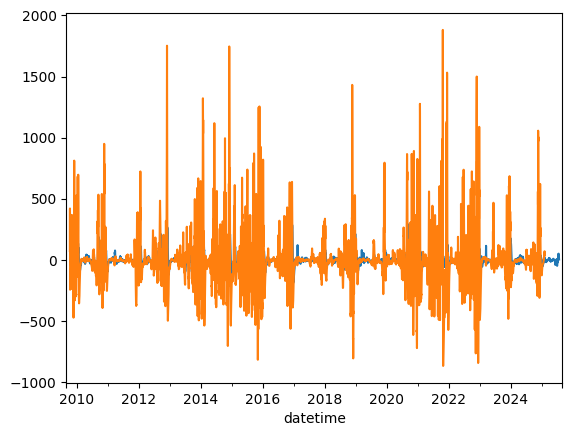

In [7]:
#40 day boxcar
#15 minute sampling frequency to Hertz
ptide=15 #data collection period in minutes

M_40d=int((60*24*40)/ptide) #size of the window in samples
box_40d = np.ones(M_40d)/M_40d

#to implement the box car, convolve with the window, then trim the errorneous values as the beginnibg and end when using this 'same' method
# Njp=len(jp_filt["Salinity[mS/cm]"])
# Nfrk=len(frk_filt["Salinity[mS/cm]"])
Nhol2 = len(hol2_filt["Salinity[microS/cm]"])
Njp = len(jp_filt["Salinity[microS/cm]"])

hol2_bc = hol2_filt["Salinity[microS/cm]"].sub(signal.convolve(hol2_filt["Salinity[microS/cm]"],box_40d,mode='same'))
jp_bc = jp_filt["Salinity[microS/cm]"].sub(signal.convolve(jp_filt["Salinity[microS/cm]"],box_40d,mode='same'))

#throw out the first and last M entries due to width of box car
hol2_bc[0:M_40d] = np.nan
hol2_bc[Nhol2-M_40d:] = np.nan

jp_bc[0:M_40d] = np.nan
jp_bc[Njp-M_40d:] = np.nan

hol2_bc.plot()
jp_bc.plot()
# ptreyes['box_18d_filt'][0:M_18d] = np.nan
# ptreyes['box_18d_filt'][Npr-M_18d:] = np.nan
# ptreyes['box_40d_filt'][0:M_40d] = np.nan
# ptreyes['box_40d_filt'][Npr-M_40d:] = np.nan
# ptreyes['box_100d_filt'][0:M_100d] = np.nan
# ptreyes['box_100d_filt'][Npr-M_100d:] = np.nan
# ptreyes['box_190d_filt'][0:M_190d] = np.nan
# ptreyes['box_190d_filt'][Npr-M_190d:] = np.nan

# monterey['box_18d_filt'][0:M_18d] = np.nan
# monterey['box_18d_filt'][Nmb-M_18d:] = np.nan
# monterey['box_40d_filt'][0:M_40d] = np.nan
# monterey['box_40d_filt'][Nmb-M_40d:] = np.nan
# monterey['box_100d_filt'][0:M_100d] = np.nan
# monterey['box_100d_filt'][Nmb-M_100d:] = np.nan
# monterey['box_190d_filt'][0:M_190d] = np.nan
# monterey['box_190d_filt'][Nmb-M_190d:] = np.nan


(18444.0, 18627.0)

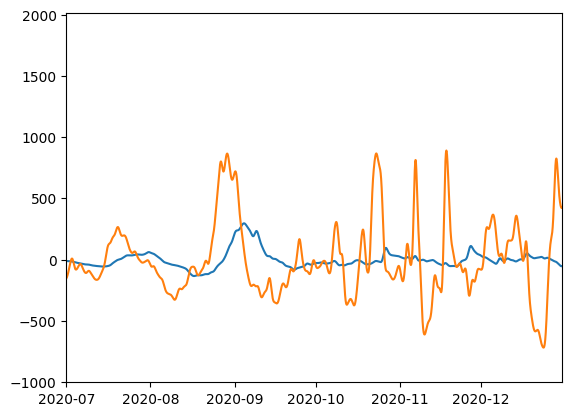

In [8]:
fig, ax =plt.subplots()
ax.plot(hol2_bc)
ax.plot(jp_bc)
ax.set_xlim(pd.to_datetime('2020-07-01'),pd.to_datetime('2020-12-31'))
#ax.set_xlim(pd.to_datetime('2020-07-01'),pd.to_datetime('2020-12-31'))

In [9]:
jp_bc

datetime
2009-09-02 19:15:00   NaN
2009-09-02 19:30:00   NaN
2009-09-02 19:45:00   NaN
2009-09-02 20:00:00   NaN
2009-09-02 20:15:00   NaN
                       ..
2025-03-18 19:00:00   NaN
2025-03-18 19:15:00   NaN
2025-03-18 19:30:00   NaN
2025-03-18 19:45:00   NaN
2025-03-18 20:00:00   NaN
Freq: 15T, Name: Salinity[microS/cm], Length: 544900, dtype: float64

In [17]:
type(jp_bc)

pandas.core.series.Series

In [18]:
# Export the signals as csv
#write to a csv
jp_bc.rename('S_residual[microS/cm]').dropna().to_csv('/global/scratch/users/jennaisrael/time_varying_data/dmsdatastore/salinity/jp_tidal_40dbc_filt.csv')


In [19]:
hol2_bc.rename('S_residual[microS/cm]').dropna().to_csv('/global/scratch/users/jennaisrael/time_varying_data/dmsdatastore/salinity/hol2_tidal_40dbc_filt.csv')

<AxesSubplot:xlabel='datetime'>

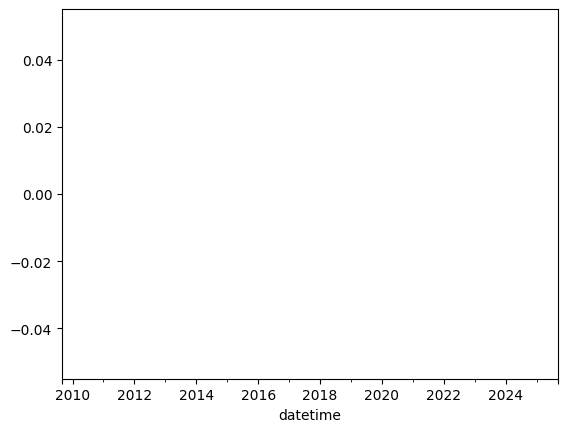

In [11]:
test = jp_filt["Salinity[mS/cm]"].sub(signal.convolve(jp_filt["Salinity[mS/cm]"],box_40d,mode='same'))
test.plot()

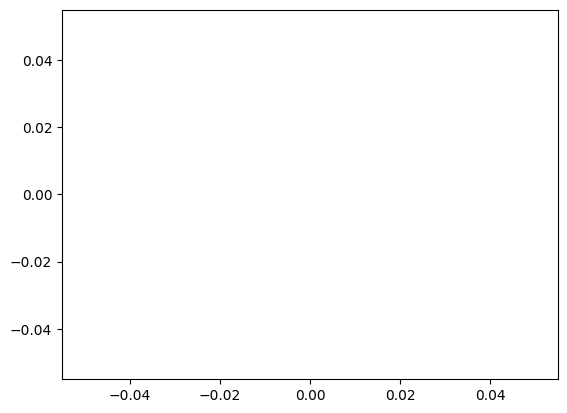

In [13]:
plt.plot(signal.convolve(jp_filt["Salinity[mS/cm]"],box_40d,mode='same'))